<a href="https://colab.research.google.com/github/raven-gith/machinelearning1/blob/main/Week%206/clusteringweek06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving clusteringweek06.csv to clusteringweek06.csv


In [2]:
import pandas as pd
import numpy as np

filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244


In [3]:
from sklearn.preprocessing import StandardScaler

df_clean = df.dropna()
scaler = StandardScaler()
X = scaler.fit_transform(df_clean)

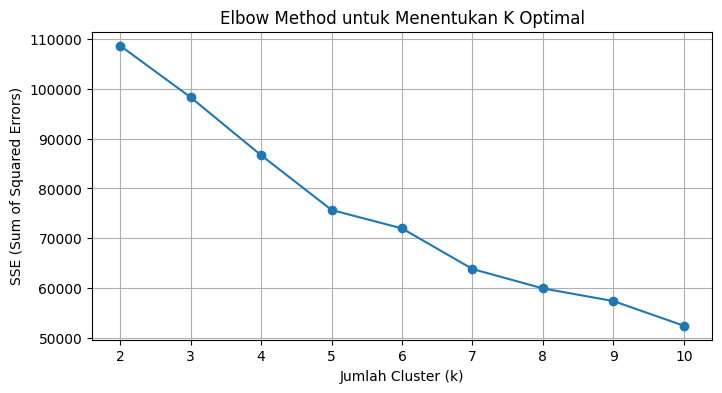

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sse = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, sse, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method untuk Menentukan K Optimal')
plt.grid(True)
plt.show()

**SSE (Sum of Squared Errors)**  
Rumus: $\text{SSE} = \sum_{i=1}^{n} \|x_i - \mu_{c(i)}\|^2$  
Dengan $x_i$ adalah data ke-i dan $\mu_{c(i)}$ adalah centroid dari cluster-nya.  
Semakin kecil SSE, semakin baik, tapi terlalu kecil bisa menyebabkan overfitting.

In [5]:
from scipy.spatial.distance import pdist, squareform

def dunn_index_calc(X, labels):
    dist_matrix = squareform(pdist(X))
    unique_clusters = np.unique(labels)
    inter_cluster = []
    intra_cluster = []

    for i in unique_clusters:
        for j in unique_clusters:
            if i < j:
                dist_ij = np.min(dist_matrix[np.ix_(labels == i, labels == j)])
                inter_cluster.append(dist_ij)

    for k in unique_clusters:
        cluster_k = dist_matrix[np.ix_(labels == k, labels == k)]
        if len(cluster_k) > 1:
            intra_cluster.append(np.max(cluster_k))

    dunn = np.min(inter_cluster) / np.max(intra_cluster)
    return dunn

In [6]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate_clustering(X, labels):
    silhouette = silhouette_score(X, labels)
    ch_index = calinski_harabasz_score(X, labels)
    db_index = davies_bouldin_score(X, labels)
    dunn_index = dunn_index_calc(X, labels)
    return silhouette, ch_index, db_index, dunn_index

In [7]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 3

# KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
labels_kmeans = kmeans.fit_predict(X)

# Agglomerative
agglo = AgglomerativeClustering(n_clusters=n_clusters)
labels_agglo = agglo.fit_predict(X)

# Evaluasi
metrics_kmeans = evaluate_clustering(X, labels_kmeans)
metrics_agglo = evaluate_clustering(X, labels_agglo)

# Tampilkan hasil
metrics_df = pd.DataFrame({
    'Metrik': ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin', 'Dunn'],
    'KMeans': metrics_kmeans,
    'Agglomerative': metrics_agglo
})
metrics_df

,Metrik,KMeans,Agglomerative
0,Silhouette,0.333652,0.349178
1,Calinski-Harabasz,2194.578237,2329.629151
2,Davies-Bouldin,1.265539,1.456754
3,Dunn,0.017104,0.054522



### Penjelasan Metrik Evaluasi:

- **Silhouette Coefficient**  
  Rumus: $s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$  
  - $a(i)$ = rata-rata jarak ke titik dalam cluster yang sama  
  - $b(i)$ = rata-rata jarak ke cluster terdekat  
  Nilai antara -1 hingga 1. Makin tinggi makin baik.

- **Calinski-Harabasz Index**  
  Rasio antara variasi antar cluster dengan variasi dalam cluster. Semakin tinggi, semakin baik.

- **Davies-Bouldin Index**  
  Rata-rata kemiripan antar cluster. Semakin rendah, semakin baik.

- **Dunn Index**  
  Rasio antara jarak minimum antar cluster dengan diameter cluster maksimum. Semakin tinggi, semakin baik.
